In [1]:
# packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import string  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tqdm import tnrange, tqdm_notebook
from itertools import combinations
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math

In [2]:
# set directories
inputpath=r'C:/Users/buca4591/Desktop/GIT/Applied_Empirical/task4/raw/data'
outputpath=r'C:/Users/buca4591/Desktop/GIT/Applied_Empirical/task4/analysis/input'

In [3]:
# upload the raw dataset 
data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

C:\Users\buca4591\AppData\Local\Temp\ipykernel_14852\1614986813.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
C:\Users\buca4591\AppData\Local\Temp\ipykernel_14852\1614986813.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",


In [4]:
# drop NaNs
data1.dropna(inplace = True)
data2.dropna(inplace = True)


In [5]:
# drop unnecessary variables
data1 = data1.drop(["iso3", "Unnamed: 0"], axis=1)
data2 = data2.drop(["iso3", "Unnamed: 0"], axis=1)

In [6]:
# split train and test datasets 
data1_train, data1_test = train_test_split(data1, test_size=0.2, random_state=2409)
data2_train, data2_test = train_test_split(data2, test_size=0.2, random_state=2409)

In [7]:
# specify in\dependent variables
y = data1_train['growth']
X = data1_train.drop(["growth"], axis=1)

X_test = data1_test.drop('growth',axis = 1)
y_test = data1_test['growth']


In [8]:
list_alpha = np.linspace(0,0.02,25)

X = data1_train.drop('growth',axis = 1)
y = data1_train['growth']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised
coeff_matrix = {}

for alpha in list_alpha:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X,y)
    coeff_matrix[alpha] = list(lasso.coef_)
    
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp.head()



C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e-02, tolerance: 7.624e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0.000000,-0.023883,0.005193,-0.002836,0.005233,0.000402,0.001689,-0.017966,-0.001896,-0.004843,-0.003191,...,-0.003806,0.001023,0.002934,-0.002547,-0.006512,0.002509,0.017451,0.001151,0.005875,-0.00631
0.000833,-0.008448,0.000920,-0.000920,0.004920,-0.001453,-0.000000,-0.016704,-0.000376,-0.004622,-0.000000,...,-0.000000,0.000000,0.000000,-0.002752,0.000000,0.001389,0.005113,0.000000,0.002245,0.00000
0.001667,-0.000000,0.000000,-0.000799,0.003724,-0.002159,-0.000000,-0.016031,-0.000000,-0.003766,-0.000000,...,0.000000,0.000000,0.000000,-0.003337,0.000000,0.001048,0.000177,0.000000,0.003078,0.00000
0.002500,-0.000000,0.000000,-0.000000,0.002727,-0.000922,-0.000000,-0.014922,-0.000000,-0.003063,-0.000000,...,0.000000,0.000000,0.000000,-0.002780,0.000000,0.000115,0.000000,0.000000,0.003865,0.00000
0.003333,-0.000000,0.000000,-0.000000,0.001588,-0.000000,-0.000000,-0.013738,-0.000000,-0.002358,-0.000000,...,0.000000,0.000000,0.000000,-0.002393,0.000000,0.000000,0.000000,0.000000,0.003845,0.00000


In [9]:
print(list_alpha)

[0.         0.00083333 0.00166667 0.0025     0.00333333 0.00416667
 0.005      0.00583333 0.00666667 0.0075     0.00833333 0.00916667
 0.01       0.01083333 0.01166667 0.0125     0.01333333 0.01416667
 0.015      0.01583333 0.01666667 0.0175     0.01833333 0.01916667
 0.02      ]


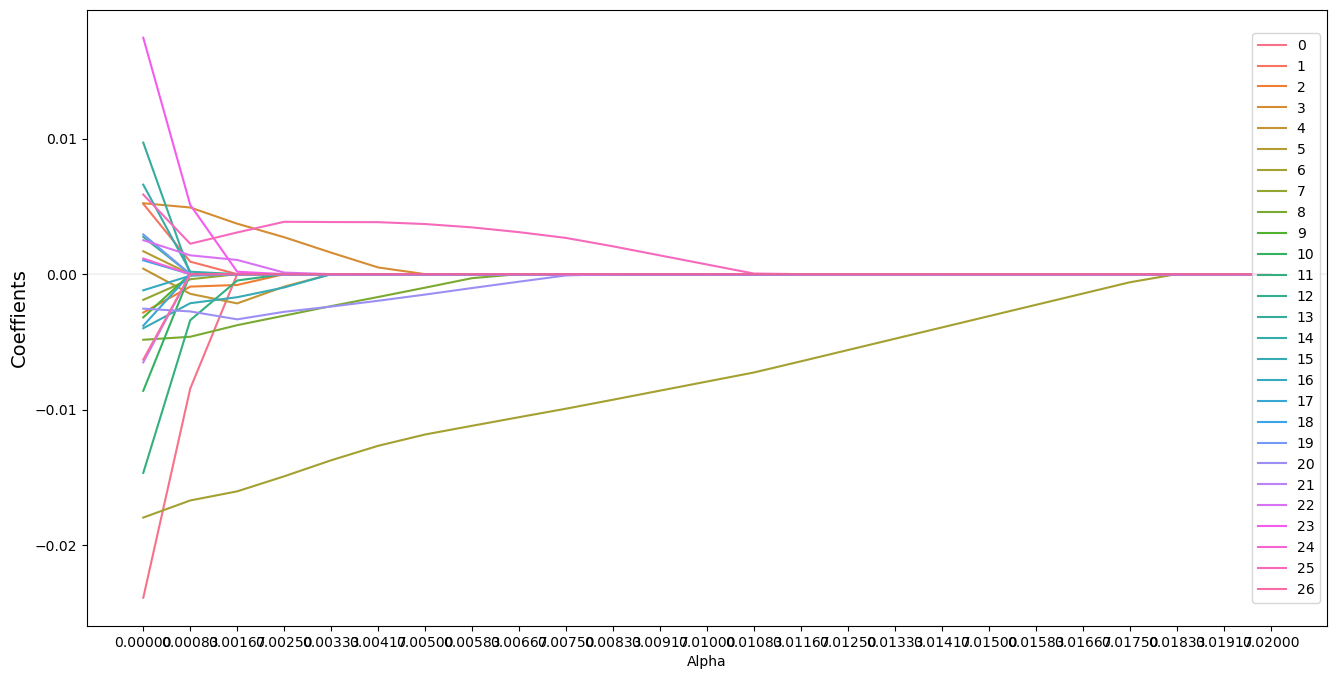

In [10]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
#plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [11]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.010558234030821555, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0005564111299403489, 0.0, 0.0, 0.0, 0.0, 0.0031000430546365165, 0.0]


In [12]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[20]])

[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0014363671274545372, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(0.0, 0.02)

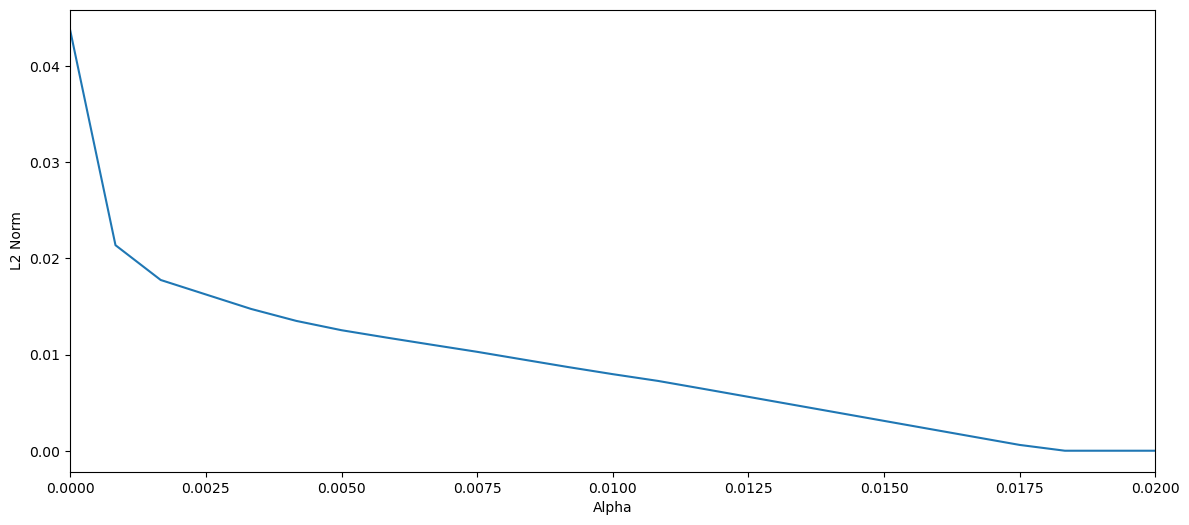

In [13]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,0.02)

In [14]:
# cross validation for this model 
parameters = {'alpha':list_alpha}
lasso = Lasso()
lasso = GridSearchCV(lasso,parameters)
lasso.fit(data1_train.drop('growth',axis = 1),data1_train['growth'])


C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.220e-03, tolerance: 5.861e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridg

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.00083333, 0.00166667, 0.0025    , 0.00333333,
       0.00416667, 0.005     , 0.00583333, 0.00666667, 0.0075    ,
       0.00833333, 0.00916667, 0.01      , 0.01083333, 0.01166667,
       0.0125    , 0.01333333, 0.01416667, 0.015     , 0.01583333,
       0.01666667, 0.0175    , 0.01833333, 0.01916667, 0.02      ])})

In [15]:
best_lasso = lasso.best_estimator_
best_lasso

Lasso(alpha=0.0008333333333333334)

In [16]:
best_lasso.coef_

array([-0.00900267,  0.00072645, -0.00066289,  0.00474333, -0.00113012,
        0.        , -0.01193069, -0.        , -0.00481354, -0.        ,
        0.        , -0.00358942, -0.        , -0.        ,  0.        ,
       -0.00215652, -0.00039588, -0.        ,  0.        ,  0.        ,
       -0.00238961,  0.        ,  0.00123437,  0.00488197,  0.        ,
        0.00253973,  0.        ])

In [17]:
pd.DataFrame({'Coefficients':list(best_lasso.coef_)},index = list(data1_train.drop('growth',axis = 1).columns))

,Coefficients
ln_y,-0.009003
hc,0.000726
gvmnt_c,-0.000663
gcf,0.004743
ext_bal,-0.001130
trade,0.000000
inflation,-0.011931
fem_emp,-0.000000
tot_emp,-0.004814
inf_mort,-0.000000


In [18]:
list_alpha = np.linspace(0,250,100)

X = data1_train.drop('growth',axis = 1)
y = data1_train['growth']

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised
coeff_matrix = {}

for alpha in list_alpha:
    ridge= Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff_matrix[alpha] = list(ridge.coef_)
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0.000000,-0.023883,0.005193,-0.002836,0.005233,0.000402,0.001689,-0.017966,-0.001896,-0.004843,-0.003191,...,-0.003806,0.001023,0.002934,-0.002547,-0.006512,0.002509,0.017451,0.001151,0.005875,-0.006310
2.525253,-0.016956,0.004493,-0.003011,0.005172,-0.001234,0.000229,-0.016834,-0.001226,-0.004986,-0.002224,...,-0.002310,0.000225,0.001853,-0.003932,-0.003409,0.002691,0.008992,0.001881,0.003855,-0.002343
5.050505,-0.013416,0.003581,-0.002891,0.004847,-0.001935,-0.000301,-0.015881,-0.001548,-0.004387,-0.001581,...,-0.001618,-0.000115,0.001279,-0.004323,-0.002002,0.002611,0.006277,0.001896,0.003503,-0.001137
7.575758,-0.011235,0.002875,-0.002780,0.004552,-0.002325,-0.000585,-0.015107,-0.001783,-0.003970,-0.001271,...,-0.001214,-0.000260,0.000985,-0.004458,-0.001185,0.002531,0.004981,0.001838,0.003323,-0.000546
10.101010,-0.009736,0.002329,-0.002683,0.004293,-0.002563,-0.000759,-0.014457,-0.001948,-0.003671,-0.001096,...,-0.000950,-0.000319,0.000832,-0.004484,-0.000654,0.002461,0.004236,0.001777,0.003201,-0.000186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239.898990,-0.000862,-0.000384,-0.000731,0.000531,-0.001241,-0.000685,-0.004242,-0.001368,-0.001217,-0.000240,...,0.000285,0.000205,0.001002,-0.001790,0.001005,0.001152,0.001303,0.000906,0.001526,0.001067
242.424242,-0.000852,-0.000381,-0.000725,0.000524,-0.001232,-0.000681,-0.004213,-0.001360,-0.001210,-0.000239,...,0.000286,0.000205,0.000999,-0.001779,0.001002,0.001147,0.001297,0.000903,0.001519,0.001064
244.949495,-0.000842,-0.000379,-0.000718,0.000518,-0.001222,-0.000677,-0.004184,-0.001352,-0.001203,-0.000238,...,0.000286,0.000206,0.000997,-0.001769,0.000999,0.001142,0.001292,0.000899,0.001512,0.001061
247.474747,-0.000832,-0.000376,-0.000712,0.000512,-0.001213,-0.000673,-0.004156,-0.001344,-0.001197,-0.000238,...,0.000286,0.000207,0.000994,-0.001759,0.000996,0.001137,0.001286,0.000896,0.001505,0.001058


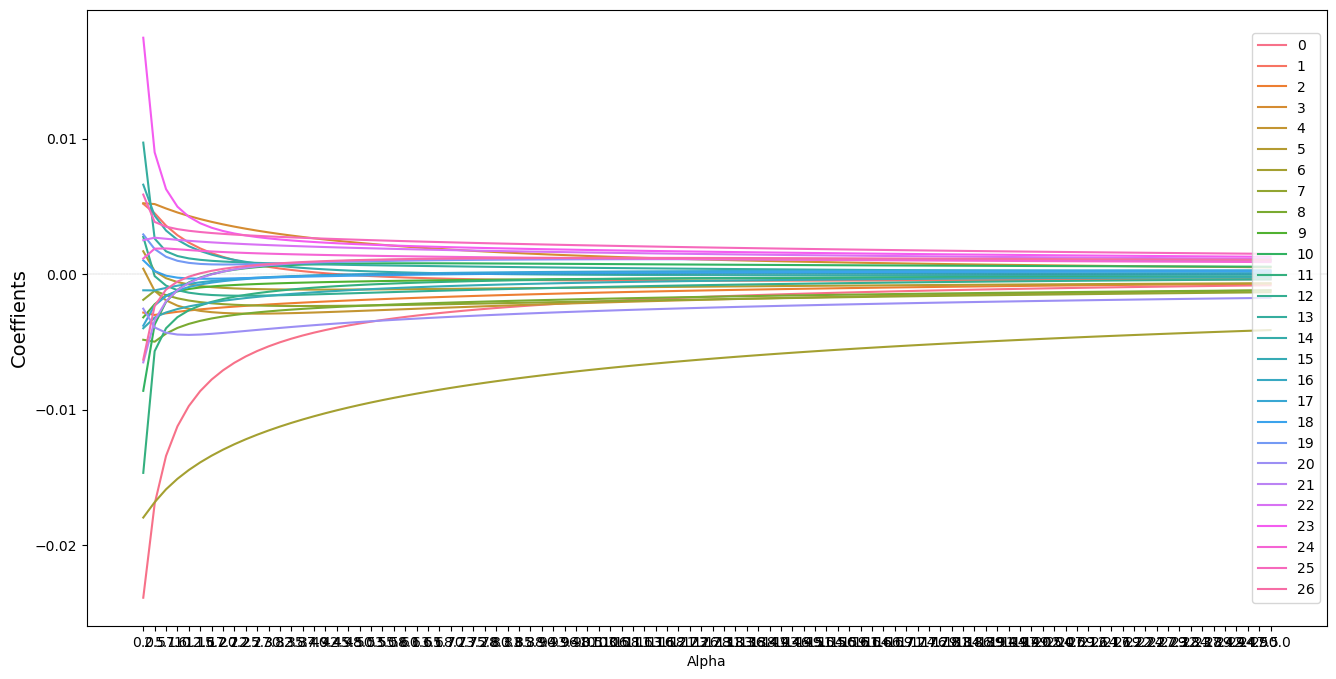

In [19]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
#plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [20]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-0.006541444380633493, 0.0010401760224325958, -0.002396284724855302, 0.0035074841079119046, -0.0028983672570206563, -0.001052231535746951, -0.01255522055965907, -0.0022590423655650623, -0.003010879689563959, -0.000801291894108141, 0.0003294976192615051, -0.0016683705912966774, -0.0015886534941680008, 0.0008924767051650041, 0.0010530714188566946, -0.0018605365157314884, -0.00036590506000953394, -0.0004316274589860882, -0.0003093226781884339, 0.0007169583880637412, -0.0042663672041336675, 0.000346551647356072, 0.002255290760746968, 0.0030003672992846377, 0.0015966917593061272, 0.0029195506739333357, 0.0005033122628665168]


In [21]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[20]])

[-0.003507979371199235, -0.00014302595888758912, -0.0018762330505380674, 0.0022328147650601056, -0.002682018644812052, -0.0011280820466496627, -0.009472991050239687, -0.0023111208268245973, -0.0023061400980187315, -0.0005233327829506014, 0.0007915355416592516, -0.0007588385934641222, -0.0013703767816856001, 0.0006579778013816352, 0.00020091510188853897, -0.0011053154310039096, -1.0670807718087743e-05, -1.8558527626433357e-07, -9.174412236807232e-05, 0.0009548326083231719, -0.0034763572828467038, 0.0010242006995017242, 0.0019069548074227129, 0.002171167626423903, 0.0013556563289295464, 0.0025094561527506977, 0.0010620080642498528]


(0.0, 250.0)

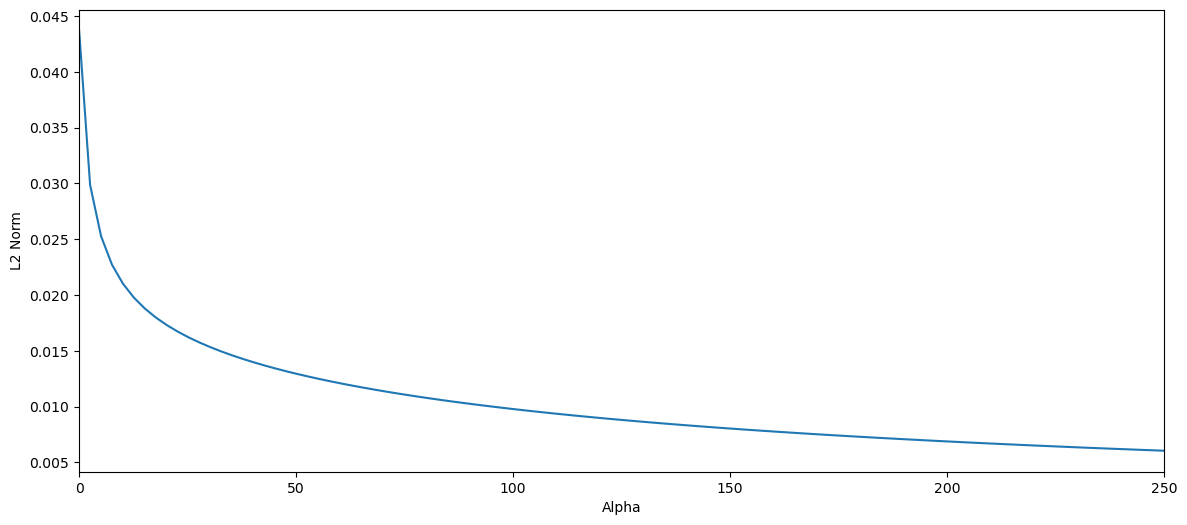

In [22]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,250)

In [23]:
# cross validation for this model
parameters = {'alpha':list_alpha}
ridge = Ridge()
ridge = GridSearchCV(ridge,parameters)
ridge.fit(data1_train.drop('growth',axis = 1),data1_train['growth'])


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([  0.        ,   2.52525253,   5.05050505,   7.57575758,
        10.1010101 ,  12.62626263,  15.15151515,  17.67676768,
        20.2020202 ,  22.72727273,  25.25252525,  27.77777778,
        30.3030303 ,  32.82828283,  35.35353535,  37.87878788,
        40.4040404 ,  42.92929293,  45.45454545,  47.97979798,
        50.50505051,  53.03030303,  55.55555556,  58.08080808,
        60.60606061,  63.13131...
       181.81818182, 184.34343434, 186.86868687, 189.39393939,
       191.91919192, 194.44444444, 196.96969697, 199.49494949,
       202.02020202, 204.54545455, 207.07070707, 209.5959596 ,
       212.12121212, 214.64646465, 217.17171717, 219.6969697 ,
       222.22222222, 224.74747475, 227.27272727, 229.7979798 ,
       232.32323232, 234.84848485, 237.37373737, 239.8989899 ,
       242.42424242, 244.94949495, 247.47474747, 250.        ])})

In [25]:
best_ridge = ridge.best_estimator_
best_ridge

Ridge(alpha=30.3030303030303)

In [26]:
best_ridge.coef_

array([-4.99040070e-03,  8.03774197e-04, -1.81421366e-03,  3.44863556e-03,
       -3.00250817e-03, -7.82185461e-04, -9.74334752e-03, -1.87197047e-03,
       -2.75563605e-03, -2.04963936e-04,  3.13547345e-04, -1.47528857e-03,
       -9.91819454e-04,  4.32942992e-04,  4.30979094e-04, -1.80659814e-03,
       -4.26516519e-04, -4.19057258e-05, -2.34770187e-05,  7.03582985e-04,
       -3.48376545e-03,  2.96690720e-04,  1.99528729e-03,  2.22060689e-03,
        1.23507650e-03,  2.35864677e-03,  6.38611258e-04])

In [27]:
pd.DataFrame({'Coefficients':list(best_ridge.coef_)},index = list(data1_train.drop('growth',axis = 1).columns))

,Coefficients
ln_y,-0.004990
hc,0.000804
gvmnt_c,-0.001814
gcf,0.003449
ext_bal,-0.003003
trade,-0.000782
inflation,-0.009743
fem_emp,-0.001872
tot_emp,-0.002756
inf_mort,-0.000205


In [28]:
X = data1_train.drop('growth',axis = 1)
y = data1_train['growth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#applying pca
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [29]:
print('Shape of data returned by pca is ',X_pca.shape)

Shape of data returned by pca is  (89, 27)


In [30]:
print('Total number of components are - ',len(pca.components_))

Total number of components are -  27


In [31]:
pca.explained_variance_ratio_*100

array([4.68195322e+01, 9.40775637e+00, 7.40967438e+00, 6.89855374e+00,
       4.52401036e+00, 4.08160184e+00, 3.50530282e+00, 3.36859461e+00,
       2.53272319e+00, 1.81295103e+00, 1.74106203e+00, 1.60186024e+00,
       1.16164356e+00, 1.03972639e+00, 7.20412392e-01, 6.86469337e-01,
       5.48845920e-01, 4.12824468e-01, 3.76730104e-01, 3.26916609e-01,
       2.63395231e-01, 2.47394149e-01, 1.68633090e-01, 1.11473243e-01,
       1.08262269e-01, 9.04619455e-02, 3.31885195e-02])

In [32]:
np.round(pca.explained_variance_ratio_*100,1)

array([46.8,  9.4,  7.4,  6.9,  4.5,  4.1,  3.5,  3.4,  2.5,  1.8,  1.7,
        1.6,  1.2,  1. ,  0.7,  0.7,  0.5,  0.4,  0.4,  0.3,  0.3,  0.2,
        0.2,  0.1,  0.1,  0.1,  0. ])

In [33]:
def pcr(X,y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    num_components = X.shape[1]
    scores = []
    variability_explained = []
    
    for n_component in range(1,num_components+1):
        pca = PCA(n_components=n_component)
        X_pca = pca.fit_transform(X_scaled)
        
        lr = LinearRegression()
        scores.append(-np.mean(cross_val_score(lr,X_pca,y,cv = 10,scoring = 'neg_mean_squared_error')))
        variability_explained.append(np.sum(np.round(pca.explained_variance_ratio_*100,1)))
        
    return scores,variability_explained    



Text(0.5, 1.0, '% explained by num of components')

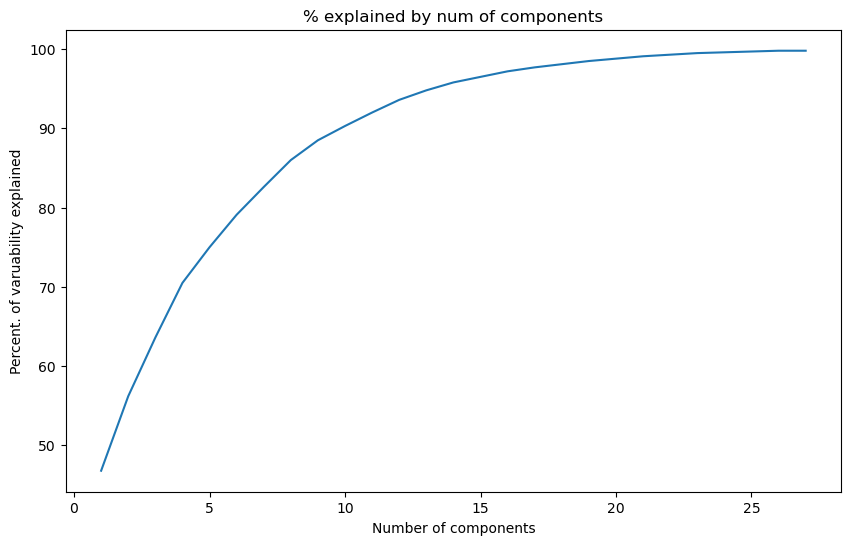

In [34]:
scores,var_explained = pcr(X,y) 
num_components = np.arange(1,X.shape[1]+1)
# Lets see the variability explained as function of the num_of_components
plt.figure(figsize = (10,6))
plt.plot(num_components,var_explained)
plt.xlabel('Number of components')
plt.ylabel('Percent. of varuability explained')
plt.title('% explained by num of components')

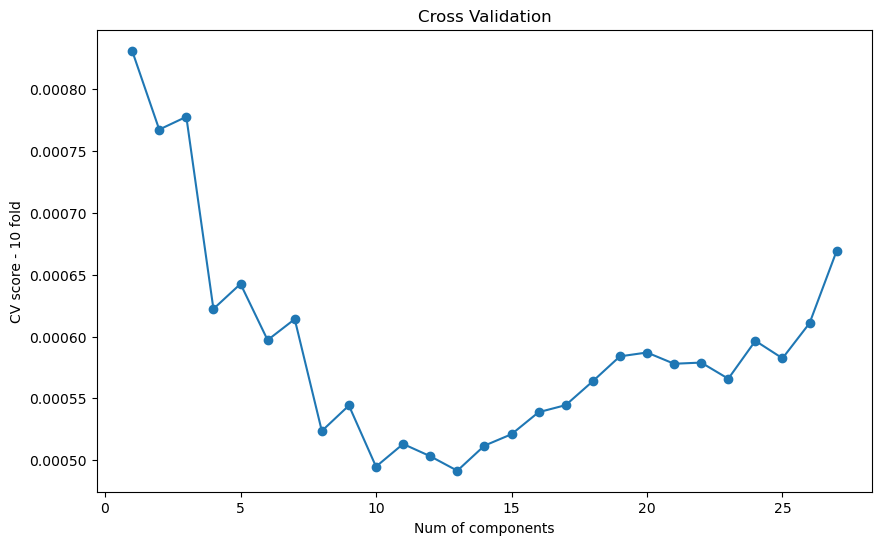

In [35]:
plt.figure(figsize = (10,6))
plt.plot(num_components,scores,marker = 'o')
plt.xlabel('Num of components')
plt.ylabel('CV score - 10 fold')
plt.title('Cross Validation')
plt.xticks = num_components

mean growth  

In [36]:
actual = y.mean()
actual = [actual] * 23
predicted = y_test
mse = np.square(np.subtract(actual,predicted)).mean()  
rmse = math.sqrt(mse) 

kitchen sink 

In [37]:
X = data1_train.drop('growth',axis = 1)
y = data1_train['growth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

[-0.02483475  0.00525051 -0.00265234  0.00478923  0.00060287  0.00235431
 -0.01234642 -0.00179206 -0.00465444 -0.00287339 -0.00840021 -0.01401803
  0.00293759  0.00977944  0.00689415 -0.00368881 -0.00109321 -0.13422452
  0.03255039  0.00311471 -0.00257055 -0.00661219  0.00257807  0.01803301
  0.0011811   0.00597693 -0.00640814]
0.029126442636149608


,Coeff
ln_y,-0.024835
hc,0.005251
gvmnt_c,-0.002652
gcf,0.004789
ext_bal,0.000603
trade,0.002354
inflation,-0.012346
fem_emp,-0.001792
tot_emp,-0.004654
inf_mort,-0.002873


compare RMSE of all models 

In [38]:
X_test = data1_test.drop('growth',axis = 1)
y_test = data1_test['growth']

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

print(X_test)

[[-0.47308137  0.25208484 -1.15814882 -0.24021605  0.17474589 -0.30754815
  -0.34251977  0.36132567  0.68881832 -0.03173528 -0.45735509  0.43105281
  -0.89109807  0.46213155 -0.24358101 -0.0059528  -0.38729833  0.21308087
   0.21696251 -1.24721913  1.36930639  0.0439435  -0.53011398 -0.46726922
  -0.06477033 -0.19590549 -0.46483802]
 [-1.47678151 -0.9283804  -0.3400365  -0.08472245 -0.05337549 -0.29677025
  -0.35500802 -1.80696383 -0.93489669 -0.34169772  0.29147275  0.86954811
  -0.80961975  1.13463714 -0.21160564  2.04776416  2.5819889   0.21795977
   0.19988136 -1.24721913  1.36930639 -1.4776588  -0.46027689 -0.90121411
  -1.56816309 -0.55447726 -1.00999195]
 [ 1.23297251  1.16636407 -0.44636782  0.53897154  0.42215473 -0.98289278
  -0.37067923  0.83202185  0.97876743 -1.12826907  1.44841954 -1.13709549
   1.13851046 -1.35421515  0.81886199 -0.69052512 -0.38729833  0.21795977
   0.21940268  0.80178373 -0.73029674  0.8844248   1.08154296  0.58541445
   0.37569611  1.05938177  0.64772

In [39]:
# predictions for all models 

#predictions1 = mean.predict(X_test)

predictions2 = model.predict(X_test)

predictions3 = best_lasso.predict(X_test)

predictions4 = best_ridge.predict(X_test)

X = pca.fit_transform(X)
X_test = pca.transform(X_test)[:,0:5]
lm = LinearRegression()
pcr = lm.fit(X[:,0:5], y)
predictions5 = pcr.predict(X_test)



C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\buca4591\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [40]:
# RMSE for all models 
rmse

0.031796590105932054

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions2))

0.11195836422569218

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions3))


0.030334819859361276

In [43]:
np.sqrt(metrics.mean_squared_error(y_test, predictions4))


0.028998880029426875

In [45]:
np.sqrt(metrics.mean_squared_error(y_test, predictions5))

0.02805034033881174

Obviously the best one is PCA. 